In [1]:
import os
import sys
sys.path.append("../library")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
import argparse

from dataProcess import *
from defaultPlot import *
from stringFormat import *

In [7]:
param = utils.set_default()

In [8]:
net_prefix = utils.network_prefix(param)
DATA_DIR = os.path.join('data', net_prefix)
FIG_DIR = os.path.join('fig', net_prefix)
totPacket_dir = os.path.join(DATA_DIR, 'totPacket')
history_dir = os.path.join(DATA_DIR, 'history')
mean = {}
sem = {}
packet_list = {1.00: list(range(1, 151)),
               0.95: list(range(1, 151)),
               0.85: list(range(1, 151)),
               0.50: list(range(1, 151))}


In [22]:
for strategy in [0.5, 0.85, 0.95, 1.00]:
    mean[strategy] = {}
    sem[strategy] = {}
    param.strategy = strategy
    tot = pd.read_pickle(os.path.join(history_dir, utils.dynamics_prefix_wo_packet(param)))
    for packet in tot.columns:
        param.packet = packet
        mean[strategy][packet], sem[strategy][packet] = utils.history2op(raw = tot[packet].values, param=param)


In [35]:
param.max_iteration = 100000
param.strategy = 0.85
param.packet = 80
file_path = os.path.join(totPacket_dir, utils.dynamics_prefix(param) + '.csv')
df = pd.read_csv(file_path, header=None)
# df
mean[param.strategy][param.packet], sem[param.strategy][param.packet] = utils.history2op(df.values, param=param)
param = utils.set_default()


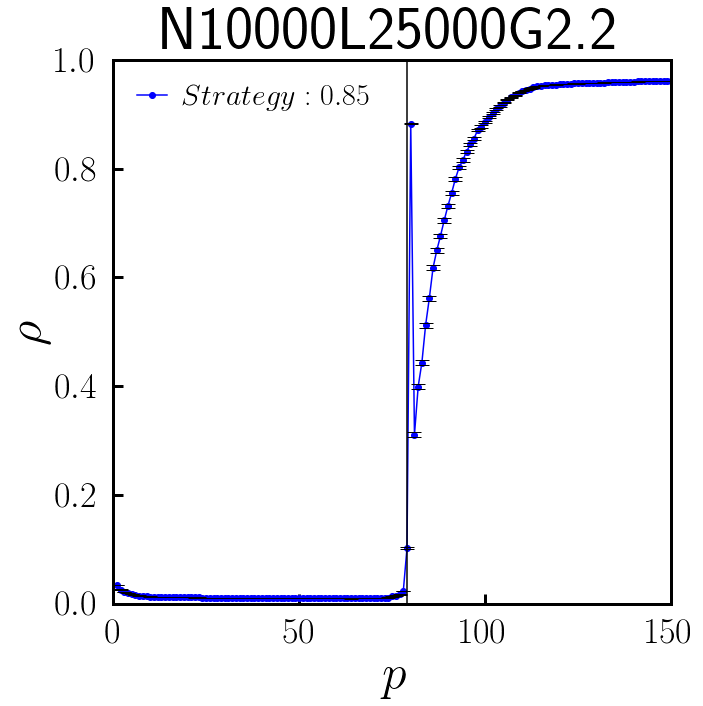

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

# strategy = 0.5
# ax.plot(packet_list[strategy], mean[strategy].values(), 'o-', color='g', label=latex_string(latex_string("Strategy: {}".format(strategy))))
# for x,y,yerr in zip(packet_list[strategy], mean[strategy].values(), sem[strategy].values()):
#     ax.errorbar(x, y, yerr, color='k', capsize=7)


strategy = 0.85
ax.plot(packet_list[strategy], mean[strategy].values(), 'o-', color='b', label=latex_string(latex_string("Strategy: {}".format(strategy))))
for x,y,yerr in zip(packet_list[strategy], mean[strategy].values(), sem[strategy].values()):
    ax.errorbar(x, y, yerr, color='k', capsize=7)

# strategy = 0.95
# ax.plot(packet_list[strategy], mean[strategy].values(), 'o-', color='y', label=latex_string(latex_string("Strategy: {}".format(strategy))))
# for x,y,yerr in zip(packet_list[strategy], mean[strategy].values(), sem[strategy].values()):
#     ax.errorbar(x, y, yerr, color='k', capsize=7)


# strategy = 1.00
# ax.plot(packet_list[strategy], mean[strategy].values(), 'o-', color='r', label=latex_string(latex_string("Strategy: {}".format(strategy))))
# for x,y,yerr in zip(packet_list[strategy], mean[strategy].values(), sem[strategy].values()):
#     ax.errorbar(x, y, yerr, color='k', capsize=7)


ax.plot([79, 79], [0,1], 'k-')

ax.set_xlabel(latex_string("p"))
ax.set_ylabel(latex_string("\\rho"))
ax.set_ylim(0,1)
ax.set_xlim(0, packet_list[0.85][-1])
ax.legend(loc='best', fontsize=30)


ax.set_title(net_prefix[:-2])

# fig.savefig(os.path.join(FIG_DIR, "orderParameter.pdf"))
fig.show()
